In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("diabetes.csv")

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [41]:
df.nunique()

Pregnancies       17
Glucose          136
BloodPressure     47
SkinThickness     51
Insulin          186
BMI              248
DPF              517
Age               52
Outcome            2
dtype: int64

In [42]:
num_feature = [col for col in df.columns if col != 'Outcome']

In [43]:
num_feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DPF',
 'Age']

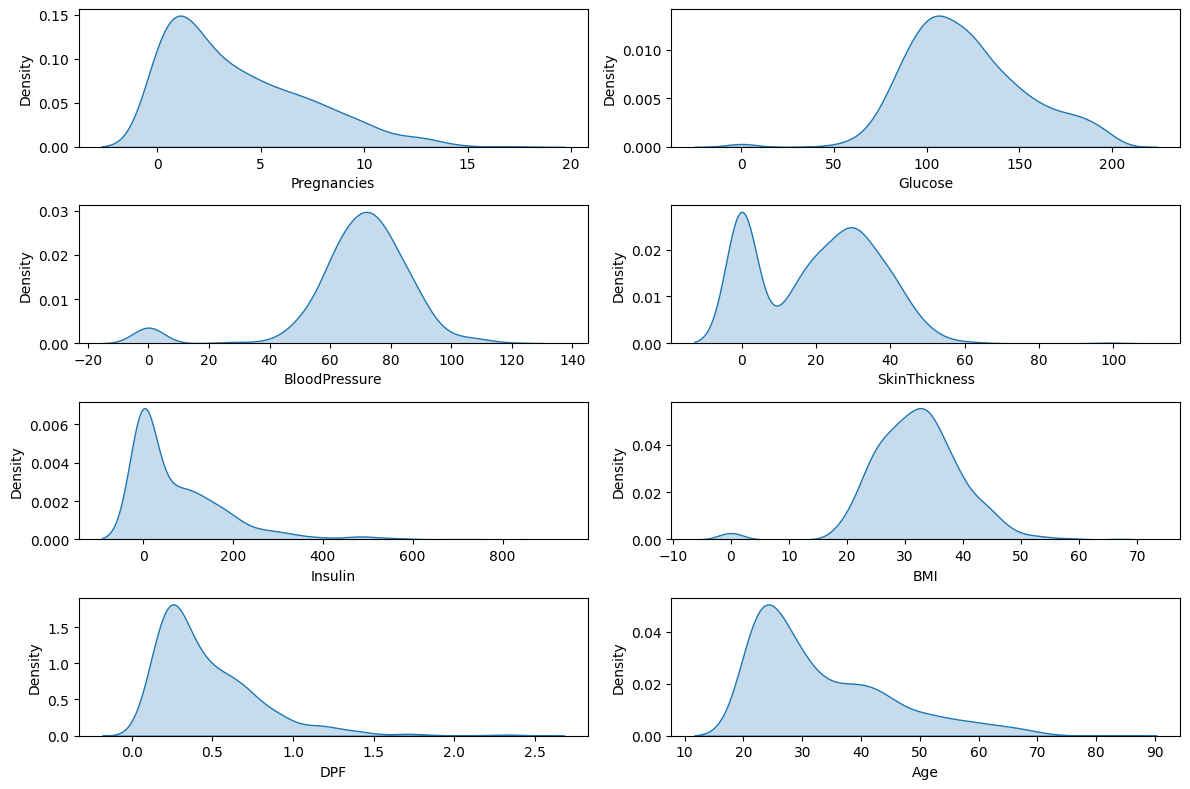

In [44]:
plt.figure(figsize=(12,8))
for i in range(len(num_feature)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=df,x=num_feature[i],fill = True)
    plt.tight_layout()

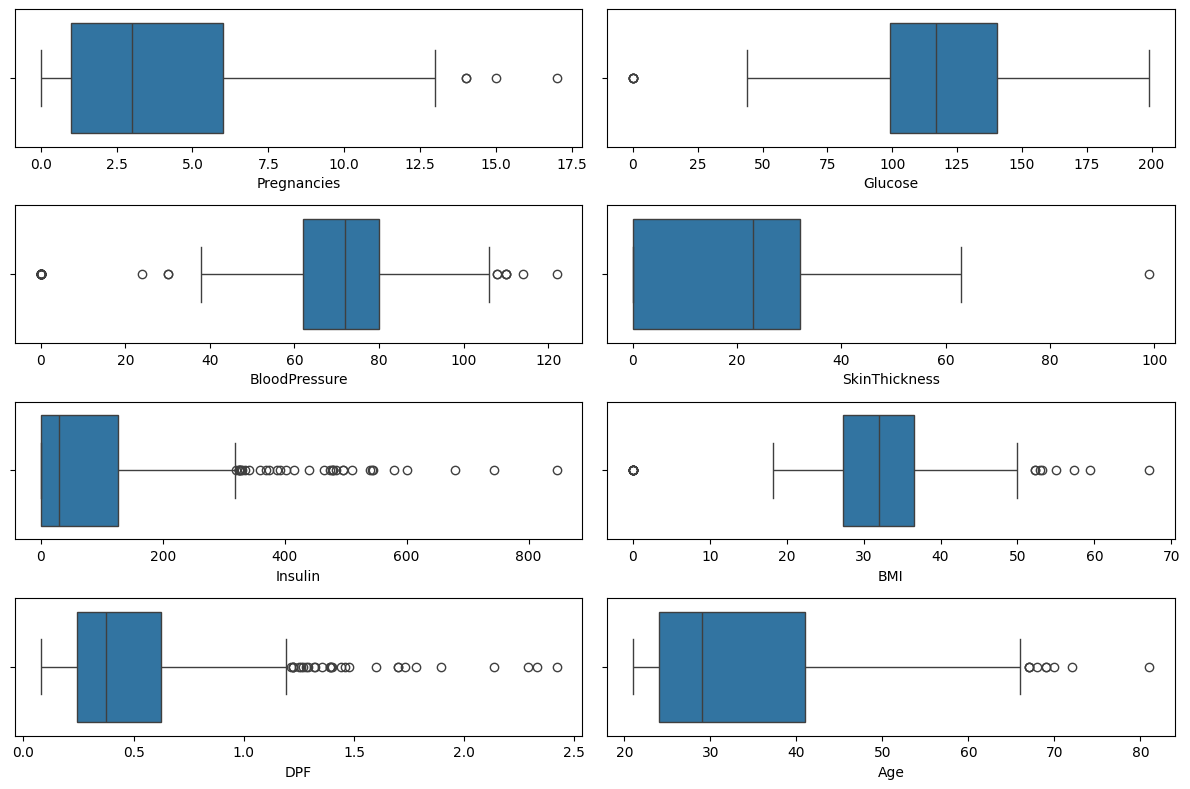

In [45]:
plt.figure(figsize=(12,8))
for i in range(len(num_feature)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df,x=num_feature[i])
    plt.tight_layout()

In [46]:
df[num_feature].skew()

Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
DPF              1.919911
Age              1.129597
dtype: float64

In [47]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

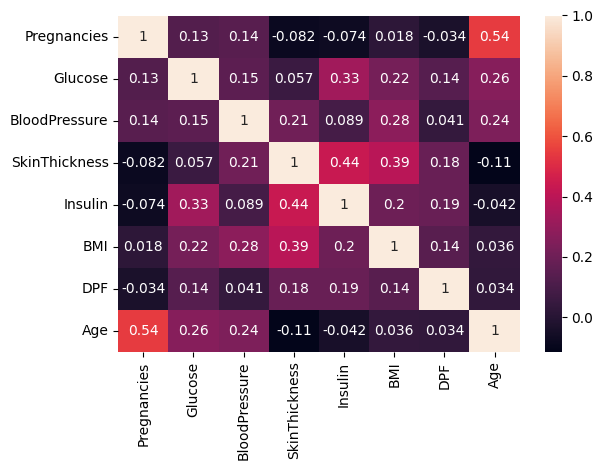

In [48]:
sns.heatmap(df[num_feature].corr(),annot=True)
plt.tight_layout()

In [49]:
zero_cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[zero_cols] = df[zero_cols].replace(0, np.nan)


In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [51]:
num_pipeline = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy = "median")),
    ("power",PowerTransformer(method="yeo-johnson")),
    ("scaler",StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_feature)
])

In [52]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [55]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")

In [56]:
svm.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [57]:
svm_pred = svm.predict(X_test)

In [58]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,svm_pred)
print("Confusion metrics\n",cm)

Confusion metrics
 [[123  28]
 [ 31  49]]


In [59]:
print(metrics.classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C":[0.1,0.2,0.3,0.5,1,2,2.5,3.4],
    "kernel":["linear","rbf","sigmoid"],
    "gamma":["scale","auto"],
    "probability": [True]
}
grid = GridSearchCV(SVC(class_weight="balanced"),param_grid,cv=5,scoring='f1')
grid.fit(X_train,y_train)

print(grid.best_params_)
best_svm = grid.best_estimator_
svm_pred_best = best_svm.predict(X_test)
print(metrics.classification_report(y_test, svm_pred_best))

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       151
           1       0.56      0.75      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.71       231



In [73]:
import pickle

pickle.dump(best_svm,open("model.pkl","wb"))
pickle.dump(preprocessor,open("preprocessor.pkl","wb"))

In [77]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,NaN,NaN,NaN,0.232,54,1


In [80]:
new_data = pd.DataFrame([{
    "Pregnancies": 2,
    "Glucose": 125,
    "BloodPressure": 110,
    "SkinThickness": 31.5,
    "Insulin": 94.0,
    "BMI": 23.4,
    "DPF": 0.157,
    "Age": 27
}])

In [81]:
model = pickle.load(open("model.pkl",'rb'))
preprocessor = pickle.load(open("preprocessor.pkl",'rb'))

processed = preprocessor.transform(new_data)
pred = model.predict(processed)

if pred==[1]:
    print("Yes There is chance of Diabetes")
else:
    print("NO There is NO chance of Diabetes")

NO There is NO chance of Diabetes
